In [3]:
#Task 1: Finding rectangles
#A nice blog-post by Johannes Rieke presents a simple setup from scratch that finds rectangles in a black & white image. 
#In order to play with it, we just have to translate a few calls from Keras to PyTorch.

**Here is an example of the training data:**

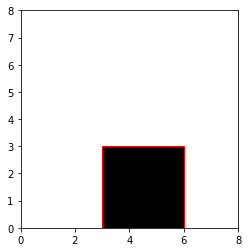

In [4]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import display, Markdown

%matplotlib inline

# Create images with random rectangles and bounding boxes. 
num_imgs = 50000

img_size = 8
min_object_size = 1
max_object_size = 4
num_objects = 1

bboxes = np.zeros((num_imgs, num_objects, 4))
imgs = np.zeros((num_imgs, img_size, img_size))  # set background to 0

for i_img in range(num_imgs):
    for i_object in range(num_objects):
        w, h = np.random.randint(min_object_size, max_object_size, size=2)
        x = np.random.randint(0, img_size - w)
        y = np.random.randint(0, img_size - h)
        imgs[i_img, x:x+w, y:y+h] = 1.  # set rectangle to 1
        bboxes[i_img, i_object] = [x, y, w, h]
        
imgs.shape, bboxes.shape

display(Markdown('**Here is an example of the training data:**'))
i = 0
plt.imshow(imgs[i].T, cmap='Greys', interpolation='none', origin='lower', extent=[0, img_size, 0, img_size])
for bbox in bboxes[i]:
    plt.gca().add_patch(matplotlib.patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], ec='r', fc='none'))

In [5]:
# Reshape and normalize the image data to mean 0 and std 1. 
X = (imgs.reshape(num_imgs, -1) - np.mean(imgs)) / np.std(imgs)
X.shape, np.mean(X), np.std(X)

# Normalize x, y, w, h by img_size, so that all values are between 0 and 1.
# Important: Do not shift to negative values (e.g. by setting to mean 0), because the IOU calculation needs positive w and h.
y = bboxes.reshape(num_imgs, -1) / img_size
y.shape, np.mean(y), np.std(y)

# Split training and test.
i = int(0.8 * num_imgs)
train_X = X[:i]
test_X = X[i:]
train_y = y[:i]
test_y = y[i:]
test_imgs = imgs[i:]
test_bboxes = bboxes[i:]

In [6]:
#Task 1a
#Construct a Pytorch model that resembles the Keras one in the original blog post, i.e. 
#have a fully connected, hidden layer with 200 neurons, 
#ReLU nonlinearity and dropout rate of 20%.

In [7]:
model = ...

In [8]:
optimizer = torch.optim.Adadelta(model.parameters())
loss_fn = torch.nn.MSELoss(size_average=False)

AttributeError: 'ellipsis' object has no attribute 'parameters'

In [9]:
inputs = Variable(torch.Tensor(train_X))
labels = Variable(torch.Tensor(train_y))

In [10]:
phase = 'train'
running_loss = 0.0
running_corrects = 0

loss_record = []
for epoch in range(30):
    optimizer.zero_grad()

    outputs = model(inputs)

    loss = loss_fn(outputs, labels)

    if phase == 'train':
        loss.backward()
        optimizer.step()

    running_loss += loss.data[0] * inputs.size(0)
    epoch_loss = running_loss / inputs.shape[0] / (epoch+1)
    loss_record.append(epoch_loss)

NameError: name 'optimizer' is not defined

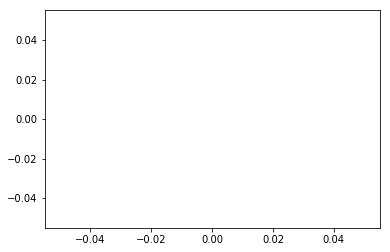

In [11]:
plt.plot(loss_record)

In [12]:
# Predict bounding boxes on the test images.
pred_y = model(Variable(torch.Tensor(test_X)))
pred_bboxes = pred_y.data * img_size
pred_bboxes = pred_bboxes.numpy().reshape(len(pred_bboxes), num_objects, -1)
pred_bboxes.shape


TypeError: 'ellipsis' object is not callable

In [13]:
def IOU(bbox1, bbox2):
    '''Calculate overlap between two bounding boxes [x, y, w, h] as the area of intersection over the area of unity'''
    x1, y1, w1, h1 = bbox1[0], bbox1[1], bbox1[2], bbox1[3]
    x2, y2, w2, h2 = bbox2[0], bbox2[1], bbox2[2], bbox2[3]

    w_I = min(x1 + w1, x2 + w2) - max(x1, x2)
    h_I = min(y1 + h1, y2 + h2) - max(y1, y2)
    if w_I <= 0 or h_I <= 0:  # no overlap
        return 0.
    I = w_I * h_I
    U = w1 * h1 + w2 * h2 - I
    return I / U

NameError: name 'pred_bboxes' is not defined

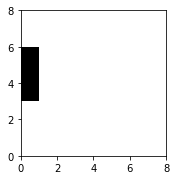

In [14]:
# Show a few images and predicted bounding boxes from the test dataset. 
plt.figure(figsize=(12, 3))
for i_subplot in range(1, 5):
    plt.subplot(1, 4, i_subplot)
    i = np.random.randint(len(test_imgs))
    plt.imshow(test_imgs[i].T, cmap='Greys', interpolation='none', origin='lower', extent=[0, img_size, 0, img_size])
    for pred_bbox, exp_bbox in zip(pred_bboxes[i], test_bboxes[i]):
        plt.gca().add_patch(matplotlib.patches.Rectangle((pred_bbox[0], pred_bbox[1]), pred_bbox[2], pred_bbox[3], ec='r', fc='none'))
        plt.annotate('IOU: {:.2f}'.format(IOU(pred_bbox, exp_bbox)), (pred_bbox[0], pred_bbox[1]+pred_bbox[3]+0.2), color='r')
# Calculate the mean IOU (overlap) between the predicted and expected bounding boxes on the test dataset. 
summed_IOU = 0.
for pred_bbox, test_bbox in zip(pred_bboxes.reshape(-1, 4), test_bboxes.reshape(-1, 4)):
    summed_IOU += IOU(pred_bbox, test_bbox)
mean_IOU = summed_IOU / len(pred_bboxes)
mean_IOU


In [15]:
#Task 1b:
#Move the computation that is currently done on the CPU over to the GPU using CUDA and 
#increase the number of epochs. Improve the training setup until you reach an IOU of above 0.6. 
#You can make the changes that move computation to the GPU directly in the cells above.

In [16]:
#Task 2: Use a pretrained model
#As mentioned in class deep learning systems are 
#hardly ever developed from scratch, but usually work 
#by refining existing solutions to similar problems. 
#For the following task, we'll work through the Transfer learning tutorial, 
#which also provides a ready-made jupyter notebook.

In [17]:
# Download the notebook and get it to run in your environment. 
# This also involves downloading the bees and ants dataset.
# Perform your own training with the provided setup.
# Change the currently chosen pretrained network (resnet) to 
# a different one. At least try out VGG and one other type.
# Load a picture that you took yourself and classify it with 
# an unmodified pretrained network (e.g. the original VGG network) 
# that can detect one out of 1000 classes.

In [ ]:
# Hints for step 3
# Focus on the section Conv net as fixed feature xtractor of the transfer learning tutorial. First, change the line

# model_conv = torchvision.models.resnet18(pretrained=True)
# to load VGG19 instead.

# Next, print out the new model_conv and identify the last step of the classification. This is not named the same way as the fc layer for resnet, but works similarity. Identify the module that contains the last classification step of the VGG model, which identifies one out of 1000 classes. Change that one into identifying 2 classes only (i.e. the ants and bees that you should start with).

# To change the structure of a hypothetical sequential component called module_name and modify its last layer into a DifferentLayer type, you can use this syntax.

# nn.Sequential(*list(model_conv.module_name.children())[:-1] +
#                      [nn.DifferentLayer(...)])
# and replace the old model_conv.module_name with the differently structured version.